# Arnold Cat Maps

Code contributed by Abhayjit Singh Gulati (211IT085)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
img = cv2.imread('assets/input_image_arnold.png', 0)  #read the image

In [4]:
resized_img = cv2.resize(img, (256, 256))   #resize the image to 256x256

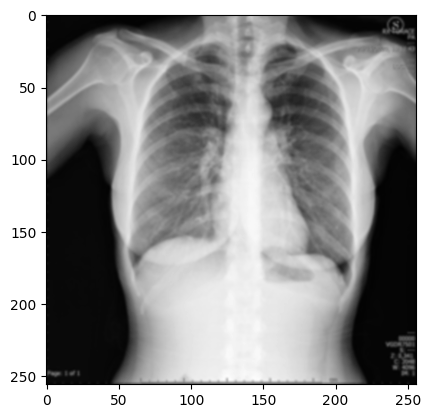

In [5]:
plt.imshow(resized_img, cmap='gray', interpolation='bicubic')

In [6]:
#show the pixel values of the resized image
resized_img

array([[ 5,  7,  6, ...,  5,  5,  4],
       [ 6,  7,  7, ...,  6,  6,  5],
       [ 5,  7,  7, ...,  6,  6,  5],
       ...,
       [ 8, 11, 11, ...,  6,  6,  5],
       [ 9, 10, 11, ...,  6,  6,  5],
       [ 6,  8,  8, ...,  5,  4,  4]], dtype=uint8)

In [7]:
# Show the maximum and minimum values of the greyscale image
max_value = np.max(resized_img)
min_value = np.min(resized_img)

print("Maximum Value:", max_value)
print("Minimum Value:", min_value)

Maximum Value: 240
Minimum Value: 1


In [8]:
def arnold_scramble (img, iterations):
    rows, cols = img.shape
    new_img = np.zeros_like(img)

    for ctr in range (0, iterations):
        for i in range (0, rows):
            for j in range (0, cols):

                new_i = (i + j) % rows
                new_j = (i + (2*j)) % cols
                new_img[new_i, new_j] = img[i, j]
        
        img = new_img.copy()

    return new_img

In [13]:
if len(sys.argv) > 1:
    # Get the number of iterations from the command-line argument
    iterations = int(sys.argv[2])
else:
    iterations = 1


resized_img = arnold_scramble(resized_img, 12)
2
max_value = np.max(resized_img)
min_value = np.min(resized_img)

print("Maximum Value:", max_value)
print("Minimum Value:", min_value)

cv2.imwrite('generated_assets/arnold.png', resized_img)

Maximum Value: 240
Minimum Value: 1


In [14]:
iterations= 192-iterations
def inverse_arnold_scramble(img, iterations):
    rows, cols = img.shape
    new_img = np.zeros_like(img)

    for ctr in range(0, iterations):
        for i in range(0, rows):
            for j in range(0, cols):
                new_i = (i - j) % rows
                new_j = ((-i) + (2 * j)) % cols
                new_img[new_i, new_j] = img[i, j]

        img = new_img.copy()

    return new_img

In [ ]:
inverse_img=inverse_arnold_scramble(img, iterations)

cv2.imwrite('generated_assets/inverse_arnold.png', inverse_img)